## GitHub :  https://github.com/VarunHimmatramka

In [469]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
%matplotlib inline

In [470]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

2.3.0


In [471]:
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)

# [1] Load in the appropriate csv file as a pandas dataframe (batting.csv)

In [472]:
df = pd.read_csv('Batting.csv')

## [2] Print out the dimensions and info about the dataframe you just created

In [473]:
df.shape

(102816, 25)

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

## [3] How many players have hit 40 or more HRs in one single season? (Number only)

In [475]:
df1 = df[df['HR']>=40].groupby(['playerID','yearID']).sum().reset_index()
df1['playerID'].nunique()

142

## [4] How many players have hit more than 600 HRs for their career? (Dataframe)

In [500]:
by_pid = df[df['HR']>0].groupby('playerID').sum()
by_pid.reset_index(inplace=True)
by = by_pid[by_pid['HR']>600][['playerID','HR']]
by.sort_values(by='HR', ascending = False).reset_index(drop=True)

,playerID,HR
0,bondsba01,762
1,aaronha01,755
2,ruthba01,714
3,rodrial01,696
4,mayswi01,660
5,griffke02,630
6,thomeji01,612
7,sosasa01,609


## [5] How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [477]:
dff = df[(df['2B']>=40) & (df['3B']>= 10) & (df['H'] >=200) & (df['HR'] >=30 )].groupby(['playerID','yearID']).sum().reset_index()
dff['playerID'].nunique()

11

## [6] How many players have had 100 or more SBs in a season? (Dataframe)

In [478]:
dfff = df[df['SB']>=100].groupby(['playerID','yearID']).sum().sort_values(by='SB', ascending = False).reset_index()
dfff[['playerID','yearID','SB']]

,playerID,yearID,SB
0,nicolhu01,1887,138.0
1,henderi01,1982,130.0
2,lathaar01,1887,129.0
3,brocklo01,1974,118.0
4,comisch01,1887,117.0
5,hamilbi01,1889,111.0
6,wardjo01,1887,111.0
7,hamilbi01,1891,111.0
8,colemvi01,1985,110.0
9,colemvi01,1987,109.0


## [7] How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [479]:
by_hr = df[(df['yearID']>=1960) & (df['yearID']<=1969)].groupby(['playerID']).agg({'HR':'sum'})
by_hr[by_hr['HR']>200].sort_values(by=['HR'],ascending=False).reset_index()

,playerID,HR
0,killeha01,393
1,aaronha01,375
2,mayswi01,350
3,robinfr02,316
4,mccovwi01,300
5,howarfr01,288
6,cashno01,278
7,bankser01,269
8,mantlmi01,256
9,cepedor01,254


## [8] Who has hit the most HRs in history? (Dataframe)

In [480]:
by = df.groupby('playerID').sum().sort_values(by='HR', ascending= False).head(1)
by.reset_index(inplace=True)
by[['playerID','HR']]

,playerID,HR
0,bondsba01,762


## [9] Who had the most hits in the 1970s? (Dataframe)

In [481]:
by = df[(df['yearID']>=1970) & (df['yearID']<=1979)].groupby(['playerID']).sum().sort_values(by='H', ascending= False).head(1)
by.reset_index(inplace=True)
by[['playerID','H']]

,playerID,H
0,rosepe01,2045


## [10] Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)

In [482]:
df1 = df.fillna(0)
df1['OBP'] =(df1['H']+df1['IBB']+df1['HBP'])/(df1['AB']+df1['IBB']+df1['HBP']+df1['SF']+df1['SH'])
df1['PA']=df1['AB']+df1['BB']+df1['IBB']+df1['SH']+df1['SF']
df1[(df1['PA'] >= 500) & (df1['yearID'] == 1977)].groupby(['playerID','nameFirst','nameLast']).agg({'OBP' : 'sum'}).nlargest(5,'OBP').reset_index()

,playerID,nameFirst,nameLast,OBP
0,carewro01,Rod,Carew,0.401562
1,parkeda01,Dave,Parker,0.355522
2,simmote01,Ted,Simmons,0.349177
3,singlke01,Ken,Singleton,0.342908
4,bostoly01,Lyman,Bostock,0.342020


## [11] Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)

In [483]:
df1['Avg']=df1['H']/df1['AB']
df1[(df1['PA']>=300) & (df1['yearID'] == 2013)].groupby(['playerID','nameFirst','nameLast']).agg({'Avg' : 'sum'}).nlargest(8,'Avg').reset_index()

,playerID,nameFirst,nameLast,Avg
0,cabremi01,Miguel,Cabrera,0.347748
1,ramirha01,Hanley,Ramirez,0.345395
2,cuddymi01,Michael,Cuddyer,0.331288
3,mauerjo01,Joe,Mauer,0.323596
4,troutmi01,Mike,Trout,0.322581
5,johnsch05,Chris,Johnson,0.321012
6,freemfr01,Freddie,Freeman,0.319419
7,puigya01,Yasiel,Puig,0.319372


## [12]Leaders in hits from 1940 up to and including 1949. (Dataframe)

In [484]:
df12 =df[(df['yearID']>=1940) & (df['yearID']<=1949) ].groupby(['playerID','yearID']).agg({'H' : 'max'}).reset_index()
df12[df12['H']>=200].reset_index(drop=True).sort_values(by='yearID')

,playerID,yearID,H
0,cramedo01,1940,200
3,mccosba01,1940,200
13,radclri01,1940,200
17,travice01,1941,218
15,spencst01,1942,203
10,peskyjo01,1942,205
19,wakefdi01,1943,200
6,musiast01,1943,220
16,stirnsn01,1944,205
2,holmeto01,1945,224


## [13]Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number)

In [485]:
hits_no=[]
for i in np.unique(df.yearID):
    hits_no.append(df[df.yearID == i].sort_values(by='H', ascending= False).reset_index(drop=True)["playerID"][0])
    
hits_n = pd.DataFrame(hits_no, columns=["playerID"])
hits_n['playerID'].value_counts().head(1)

suzukic01    6
Name: playerID, dtype: int64

## [14] Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [486]:
df.groupby(['playerID','nameFirst','nameLast']).agg({'G' : 'sum'}).nlargest(5,'G').sort_values(by= 'G', ascending = False).reset_index()

,playerID,nameFirst,nameLast,G
0,rosepe01,Pete,Rose,3562
1,yastrca01,Carl,Yastrzemski,3308
2,aaronha01,Hank,Aaron,3298
3,henderi01,Rickey,Henderson,3081
4,cobbty01,Ty,Cobb,3035


## [15] How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?

In [487]:
df15 = df.groupby(['playerID','nameFirst','nameLast']).agg({'H' : 'sum','HR' : 'sum'}).sort_values(by= 'H', ascending = False).reset_index()

df15[(df15['H']>3000) & (df15['HR']>=500)]['playerID'].nunique()

5

## [16] How many HRs were hit during the entire 1988 season?

In [488]:
df[df['yearID']== 1988]['HR'].sum()

3180

## [17] Filter out and show the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs. (Dataframe sorted by average)


In [489]:
df1[(df1['nameFirst']=='Wade') & (df['nameLast']=='Boggs') & (df['AB']>=500)].nlargest(3,'Avg').reset_index(drop=True)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,PA,Avg
0,boggswa01,Wade,Boggs,1958,1985,1,BOS,AL,161,653,...,96,61.0,5.0,4.0,3.0,2.0,20.0,0.373313,759.0,0.367534
1,boggswa01,Wade,Boggs,1958,1988,1,BOS,AL,155,584,...,125,34.0,18.0,3.0,0.0,7.0,23.0,0.383987,734.0,0.366438
2,boggswa01,Wade,Boggs,1958,1987,1,BOS,AL,147,551,...,105,48.0,19.0,2.0,1.0,8.0,13.0,0.380379,684.0,0.362976


## [18] Filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP. (Dataframe)

In [490]:
df18 =df1[(df1['PA']>=400) & (df1['yearID']==1995)].groupby(['playerID','nameFirst','nameLast']).sum().sort_values(by = 'OBP',ascending=False)
df18[['OBP','PA']].nlargest(10,'OBP').reset_index()

,playerID,nameFirst,nameLast,OBP,PA
0,martied01,Edgar,Martinez,0.385609,650.0
1,gwynnto01,Tony,Gwynn,0.376812,586.0
2,piazzmi01,Mike,Piazza,0.360987,484.0
3,knoblch01,Chuck,Knoblauch,0.346570,622.0
4,thomafr04,Frank,Thomas,0.346296,670.0
5,bicheda01,Dante,Bichette,0.346218,613.0
6,bellde01,Derek,Bell,0.344017,493.0
7,walkela01,Larry,Walker,0.338403,561.0
8,salmoti01,Tim,Salmon,0.336976,634.0
9,puckeki01,Kirby,Puckett,0.336879,617.0


## [19] Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928? (Dataframe)

In [491]:
df91=df[(df['yearID']==1922)][['nameFirst', 'nameLast','3B',]].nlargest(1,'3B')
df92=df[(df['yearID']==1925)][['nameFirst', 'nameLast','3B']].nlargest(1,'3B')
df93=df[(df['yearID']==1926)][['nameFirst', 'nameLast','3B']].nlargest(1,'3B')
df94=df[(df['yearID']==1928)][['nameFirst', 'nameLast','3B']].nlargest(1,'3B')
#temp=temp1+temp2+temp3+temp4

df19=[df91,df92,df93,df94]

df191=pd.concat(df19)
df191.reset_index(drop=True)

,nameFirst,nameLast,3B
0,Jake,Daubert,22
1,Kiki,Cuyler,26
2,Paul,Waner,22
3,Earle,Combs,21


## [20] How many players have hit 30 or more HRs in a season while also stealing (SB) 30 or more bases? (Number)

In [492]:
df20 = df[(df['HR']>=30) & (df['SB']>=30)].groupby(['playerID','yearID']).sum().reset_index()
df20['playerID'].nunique()

37

## [21] Who had the highest OBP in 1986 with at least 400 PAs? (Dataframe)

In [493]:
df21 = df1[(df1['PA']>=400) & (df1['yearID']==1986)].groupby(['playerID','nameFirst','nameLast']).sum().nlargest(1,'OBP')
df21[['OBP','PA']]

,,,OBP,PA
playerID,nameFirst,nameLast,,
boggswa01,Wade,Boggs,0.36711,707.0


## [22] Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [494]:
df21 = df1[(df1['PA']>=400) & (df1['yearID']==1997) & (df['lgID']=='NL')].groupby(['playerID','nameFirst','nameLast']).sum().nlargest(1,'OBP')
df21[['OBP','PA']]

,,,OBP,PA
playerID,nameFirst,nameLast,,
walkela01,Larry,Walker,0.393333,664.0


## [23] Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [495]:
leag_avg= df1[(df1['yearID']== 2012) & (df1['PA']>=500)]['HR'].mean()
df[df['HR']>leag_avg][['playerID','nameFirst','nameLast','HR']].reset_index(drop=True)

,playerID,nameFirst,nameLast,HR
0,ansonca01,Cap,Anson,21
1,dalryab01,Abner,Dalrymple,22
2,pfefffr01,Fred,Pfeffer,25
3,willine01,Ned,Williamson,27
4,thompsa01,Sam,Thompson,20
5,freembu01,Buck,Freeman,25
6,schulfr01,Frank,Schulte,21
7,cravaga01,Gavvy,Cravath,24
8,ruthba01,Babe,Ruth,29
9,ruthba01,Babe,Ruth,54


## [24] Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [496]:
list=[]
temp_data=[]
for i in df['yearID']:
    list.append(i)
list=set(list)

for j in list1:    
    v=df[(df['H']>=50) & (df['yearID']==j)].groupby(['yearID','playerID']).agg({'birthYear':'max','H':'max'}).nlargest(1,'birthYear')
    temp_data.append(v)
df24=pd.concat(temp_data)
df24

,,birthYear,H
yearID,playerID,,
1871,barnero01,1850,63
1872,ansonca01,1852,90
1873,hinespa01,1855,60
1874,bondto01,1856,54
1875,bondto01,1856,77
1876,bondto01,1856,50
1877,brownle01,1858,56
1878,brownle01,1858,74
1879,wardjo01,1860,104


## [25] Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [497]:
a=df[df['HR']>0].groupby(['playerID']).agg({'birthYear':'max','HR':'sum'}).sort_values(by='birthYear',ascending=False)
a[a['HR']>=300].nlargest(5,'birthYear')

,birthYear,HR
playerID,,
fieldpr01,1984,319
cabremi01,1983,446
encared01,1983,310
gonzaad01,1982,308
teixema01,1980,409


## BONUS QUESTIONS

## Graph total HRs per season using bar graph

In [498]:
df_graph1 = df[df['HR']>0].groupby('yearID').agg({'HR':'sum'}).reset_index()
df_graph1.iplot(kind='bar',x='yearID',y='HR',yTitle='HR',xTitle='Years',title='Total HRs per season')

## Using a line graph please graph the average HRs per AB (think about this) per season

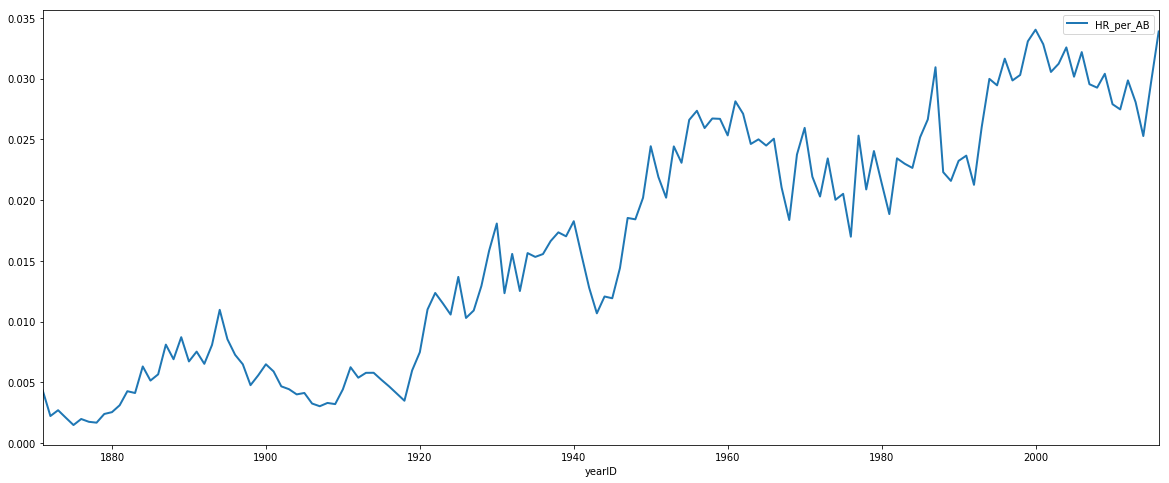

In [499]:
df_graph2 = df.groupby('yearID').agg({'HR':'sum', 'AB':'sum'}).reset_index()
df_graph2['HR_per_AB']=df_graph2['HR']/df_graph2['AB']
df_graph2.plot.line(x='yearID',y='HR_per_AB',figsize=(20,8),lw=2)